# Initial EDA

## Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Datasets

In [8]:
peptides_df = pd.read_csv('../data/train_peptides.csv')
proteins_df = pd.read_csv('../data/train_proteins.csv')
clinical_data_df = pd.read_csv('../data/train_clinical_data.csv')
supplemental_clinical_data_df = pd.read_csv('../data/supplemental_clinical_data.csv')

248

## Cleaning Clinical Data

**Note:** We need to find a way of dealing with NaNs. We are backfilling at the moment, but we need to tinker with this to see how model accuracy changes

In [4]:
# clinical_data_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']] = clinical_data_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].fillna(method = 'bfill', axis = 1)

## Distribution of UPDRS Scores

Text(0.5, 1.0, 'Score Distribution for UPDRS Category 4')

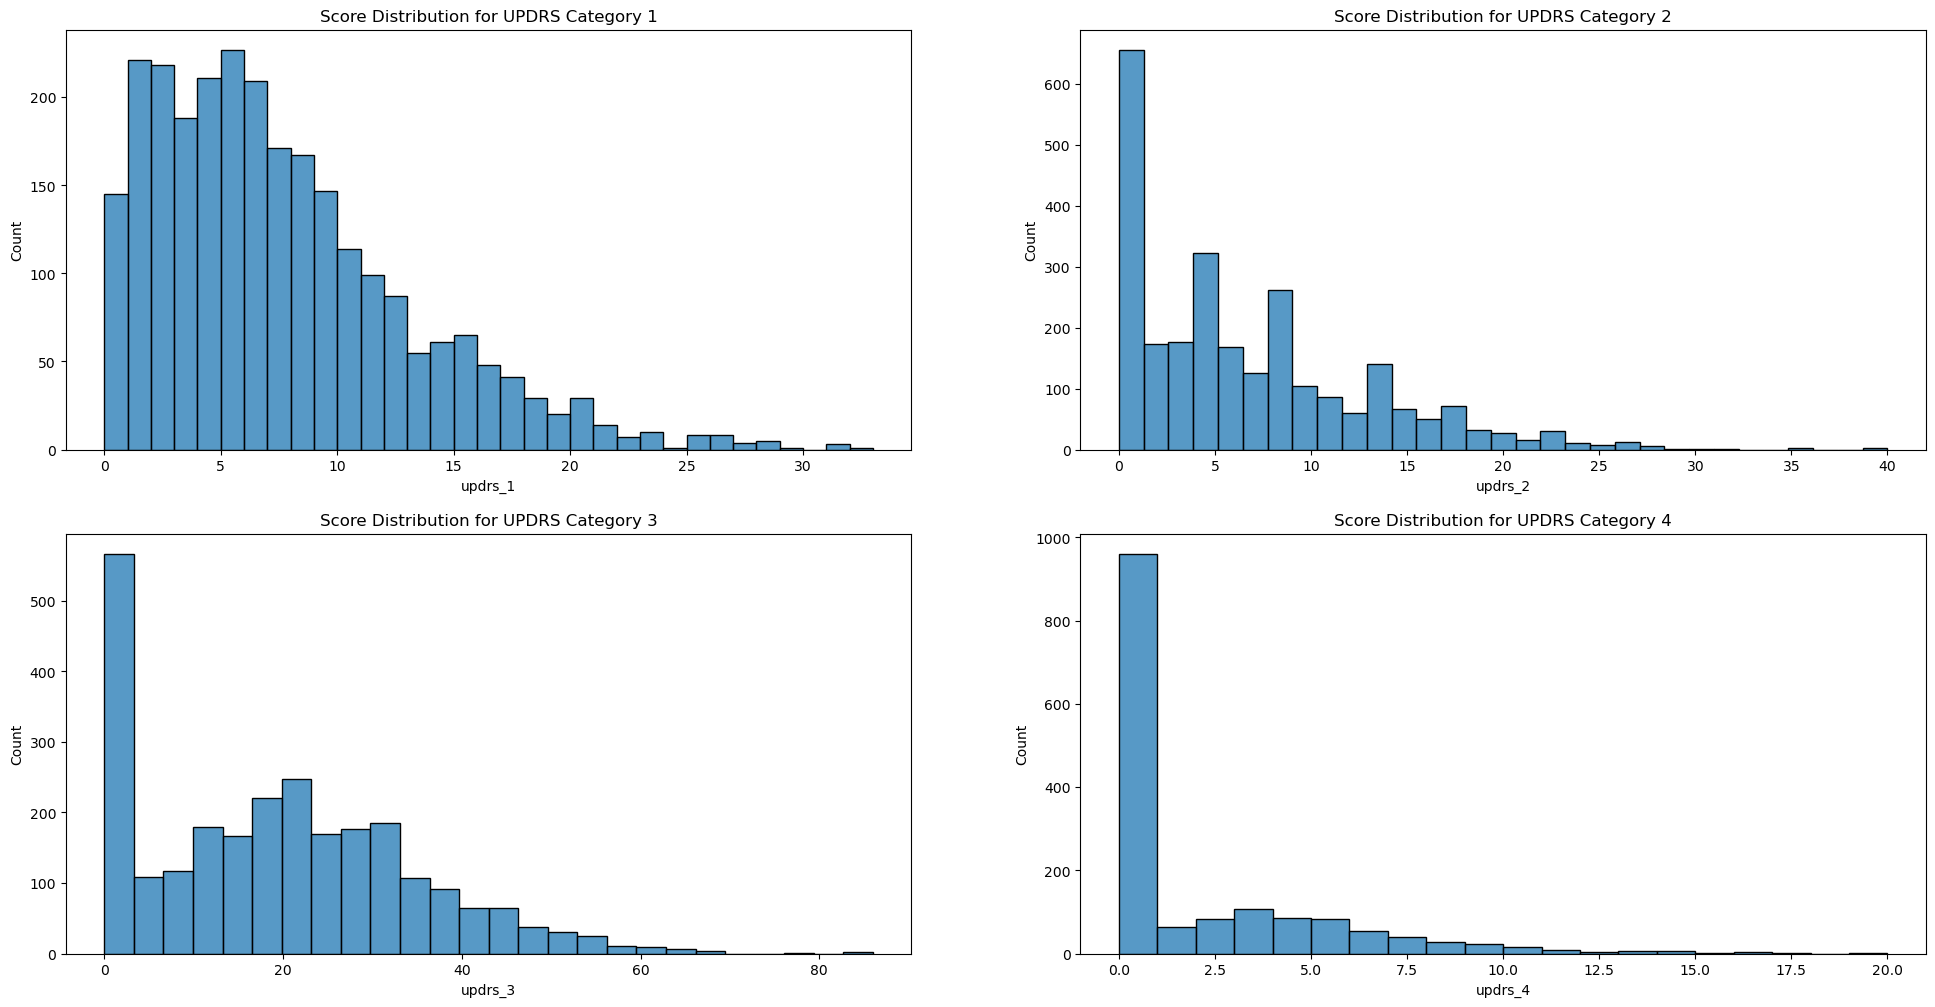

In [5]:
fig_updrs, axs_updrs = plt.subplots(2, 2, figsize = (24,12))

# updrs_1
sns.histplot(ax = axs_updrs[0, 0], data = clinical_data_df, x = 'updrs_1', stat = 'count')
axs_updrs[0, 0].set_title('Score Distribution for UPDRS Category 1')

# updrs_2
sns.histplot(ax = axs_updrs[0, 1], data = clinical_data_df, x = 'updrs_2', stat = 'count')
axs_updrs[0, 1].set_title('Score Distribution for UPDRS Category 2')

# updrs_3
sns.histplot(ax = axs_updrs[1, 0], data = clinical_data_df, x = 'updrs_3', stat = 'count')
axs_updrs[1, 0].set_title('Score Distribution for UPDRS Category 3')

# updrs_4
sns.histplot(ax = axs_updrs[1, 1], data = clinical_data_df, x = 'updrs_4', stat = 'count', binwidth = 1)
axs_updrs[1, 1].set_title('Score Distribution for UPDRS Category 4')


## Creating pivot tables to aggregate data by patient visit

Again we need to fill NaNs. This is more complicated because we need to devise a way of modeling how peptide and protein counts change over the course of visits.

Also note, protein and peptide data were only measured on certain visits, so they are only available for 1113 out of 2615 total visits.

I think a good solution for this is to train a linear regression model to predict protein and peptide counts based on past patient data, and use that to train the UPDRS predictor.

In [6]:
protein_counts_visit = pd.pivot_table(data = proteins_df, index = 'visit_id', columns = 'UniProt', values = 'NPX', sort = False) # protein counts in patients by visit_id

peptide_counts_visit = pd.pivot_table(data = peptides_df, index = 'visit_id', columns = 'Peptide', values = 'PeptideAbundance', sort = False) # peptide counts in patients by visit_id

peptide_counts_visit.index.unique().shape

(1113,)

# Some basic regression models

## scikit-learn imports

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

## PyTorch imports